In [1]:
import pandas as pd

# Read a sample (full file is very large; adjust nrows or use chunking as needed)
df = pd.read_csv("US_Accidents_March23.csv", nrows=500000)

print(df.shape)
print(df.columns)


(500000, 46)
Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [2]:
# Parse datetimes
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["End_Time"] = pd.to_datetime(df["End_Time"])

# Filter impossible or obviously bad coordinates (optional)
df = df[(df["Start_Lat"].between(24, 50)) & (df["Start_Lng"].between(-125, -65))]

# Derive time-of-day features
df["Hour"] = df["Start_Time"].dt.hour
df["DayOfWeek"] = df["Start_Time"].dt.day_name()
df["Month"] = df["Start_Time"].dt.month_name()

# Accident duration in hours
df["Duration_hr"] = (df["End_Time"] - df["Start_Time"]).dt.total_seconds() / 3600


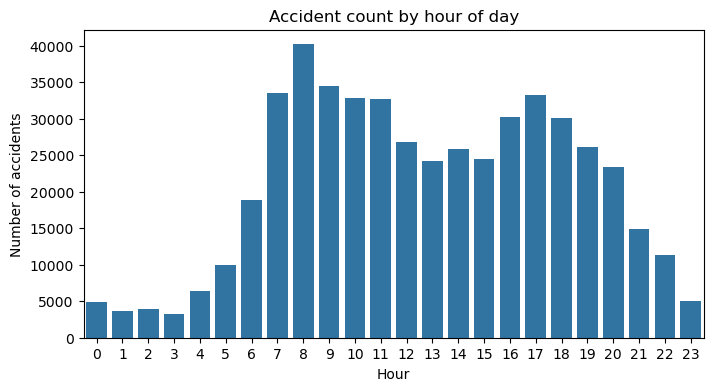

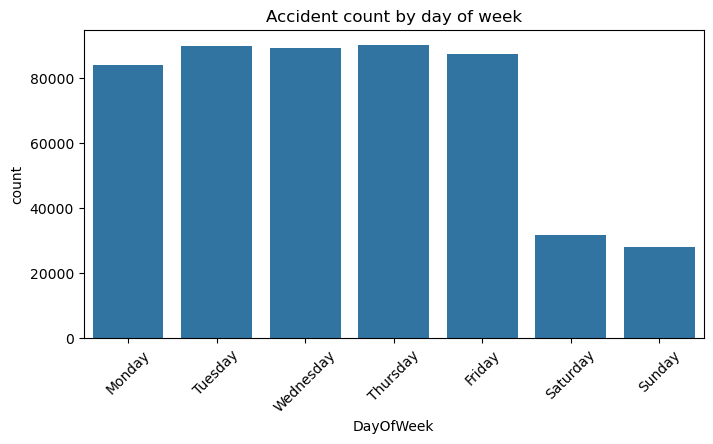

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Accidents by hour
plt.figure(figsize=(8,4))
sns.countplot(x="Hour", data=df, order=sorted(df["Hour"].unique()))
plt.title("Accident count by hour of day")
plt.xlabel("Hour")
plt.ylabel("Number of accidents")
plt.show()

# Accidents by day of week
plt.figure(figsize=(8,4))
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sns.countplot(x="DayOfWeek", data=df, order=order)
plt.title("Accident count by day of week")
plt.xticks(rotation=45)
plt.show()


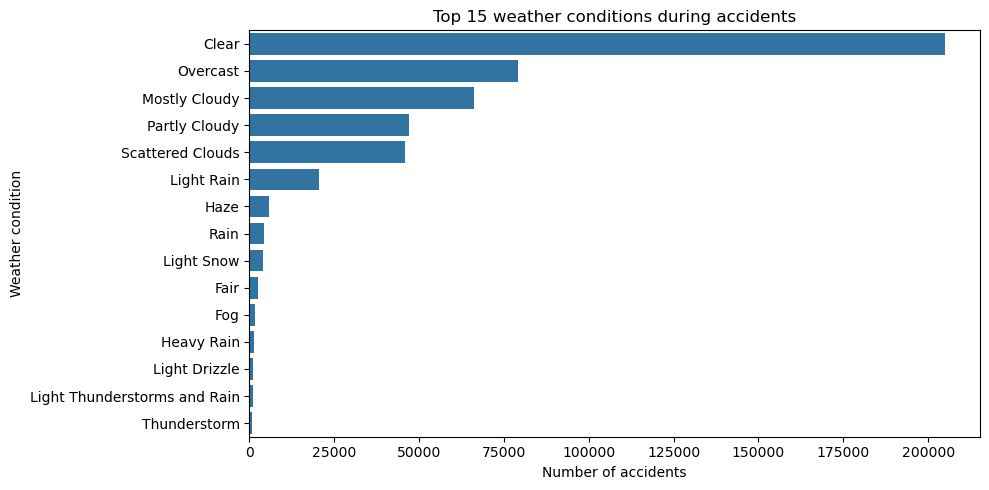

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Single corrected block - copy paste and run
top_weather = (
    df["Weather_Condition"]
    .value_counts()
    .head(15)
    .reset_index()
)
top_weather.columns = ["Weather_Condition", "Count"]

plt.figure(figsize=(10, 5))
sns.barplot(data=top_weather, x="Count", y="Weather_Condition", orient="h")
plt.title("Top 15 weather conditions during accidents")
plt.xlabel("Number of accidents")
plt.ylabel("Weather condition")
plt.tight_layout()
plt.show()


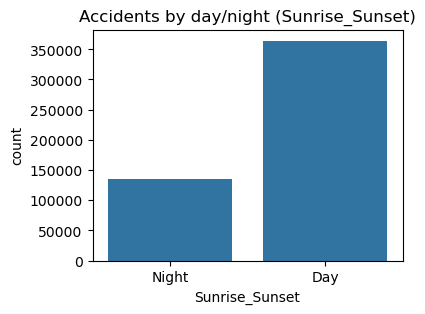

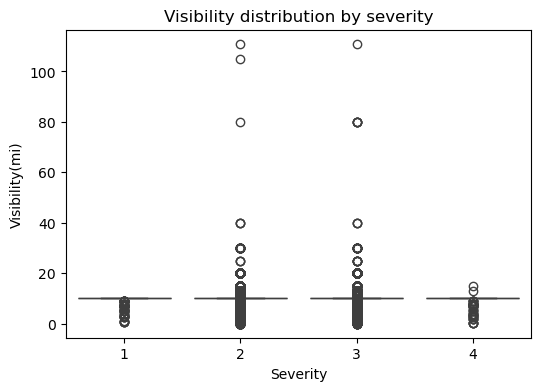

In [6]:
# Day vs night based on Sunrise_Sunset
if "Sunrise_Sunset" in df.columns:
    plt.figure(figsize=(4,3))
    sns.countplot(x="Sunrise_Sunset", data=df)
    plt.title("Accidents by day/night (Sunrise_Sunset)")
    plt.show()

# Visibility vs Severity
plt.figure(figsize=(6,4))
sns.boxplot(x="Severity", y="Visibility(mi)", data=df)
plt.title("Visibility distribution by severity")
plt.show()


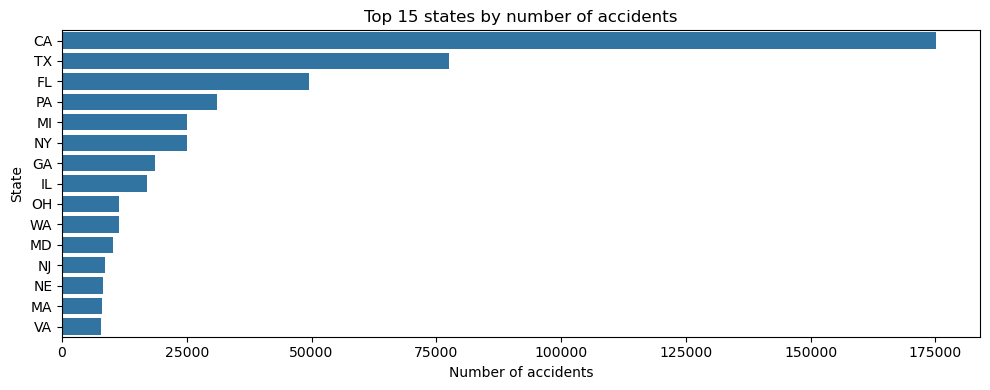

In [8]:
# Single corrected block for states - copy paste and run
state_counts = (
    df["State"]
    .value_counts()
    .head(15)
    .reset_index()
)
state_counts.columns = ["State", "Count"]

plt.figure(figsize=(10, 4))
sns.barplot(data=state_counts, x="Count", y="State")
plt.title("Top 15 states by number of accidents")
plt.xlabel("Number of accidents")
plt.ylabel("State")
plt.tight_layout()
plt.show()


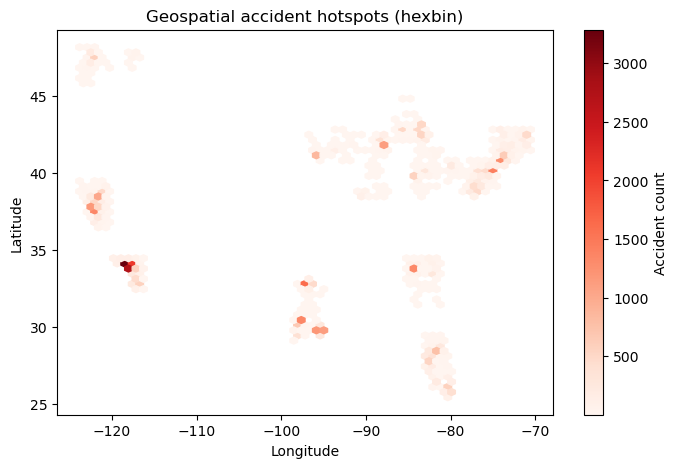

In [11]:
# Sample for plotting
sample = df.sample(50000, random_state=42)

plt.figure(figsize=(8,5))
plt.hexbin(
    sample["Start_Lng"],
    sample["Start_Lat"],
    gridsize=60,
    cmap="Reds",
    mincnt=1
)
plt.colorbar(label="Accident count")
plt.title("Geospatial accident hotspots (hexbin)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
